<a href="https://colab.research.google.com/github/shuhbam199/FebGithub/blob/main/Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('customer_segmentation.csv')
df.head()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


# K-Means Clustering

### from Scratch

**Initializing all the variables and data**

In [3]:
data_size = 2000
num_iters = 15
num_clusters = 4

from sklearn.datasets import make_blobs
data, y = make_blobs(n_samples=2000, centers=4, n_features=2,random_state=0, cluster_std=0.5)

**Function to plot the clusters**

In [4]:
import matplotlib.pyplot as plt
def plot(data, centroids):
    plt.scatter(data[:, 0], data[:, 1], marker = '.',
                color = 'gray', label = 'data points')
    plt.scatter(centroids[:, 0], centroids[:, 1],
                color = 'red', label = 'centroid')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()

In [5]:
# Initialise centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

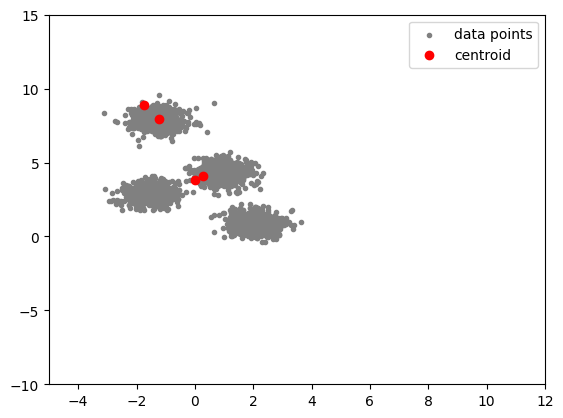

In [6]:
plot(data, centroids)

**Implementing K-means**

In [7]:
data.shape

(2000, 2)

In [8]:
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

In [9]:
centroids

array([[ 2.14959359,  3.66420677],
       [ 2.0828532 ,  1.04715239],
       [-2.08060479,  8.05064946],
       [ 1.78051825,  0.3483783 ]])

In [10]:
data[0]

array([-0.99610393,  2.32543854])

In [11]:
centroids[0]

array([2.14959359, 3.66420677])

In [12]:
def euclidean(x, centroids):
    dist = np.array([]).reshape(len(x),0)
    for centroid in centroids:
        distance = (((data - centroid)**2).sum(axis=1)**0.5).reshape(-1,1)
        dist = np.hstack([dist, distance])
    return dist

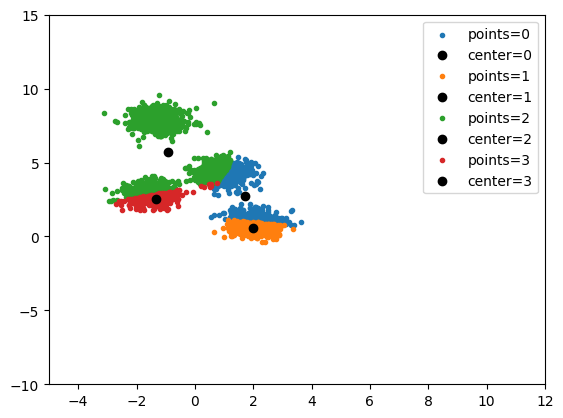

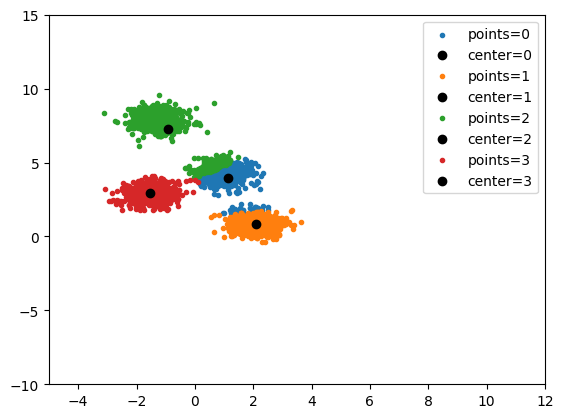

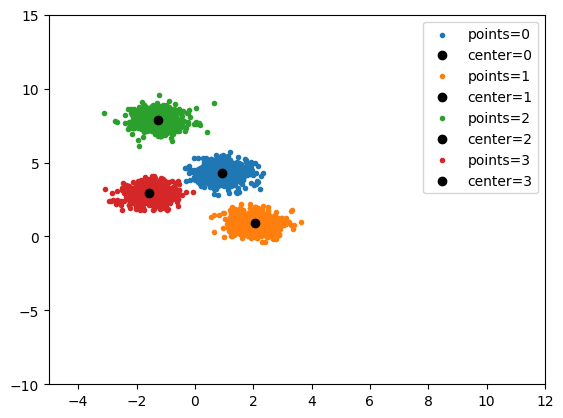

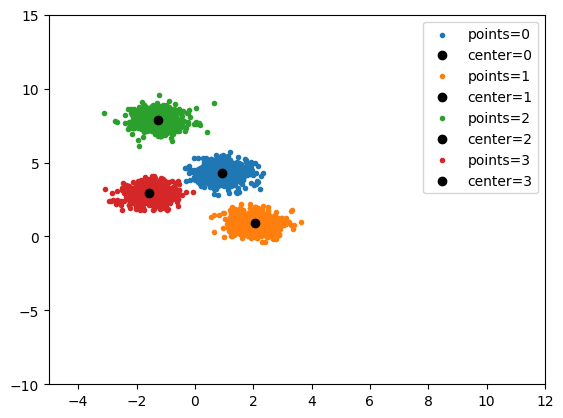

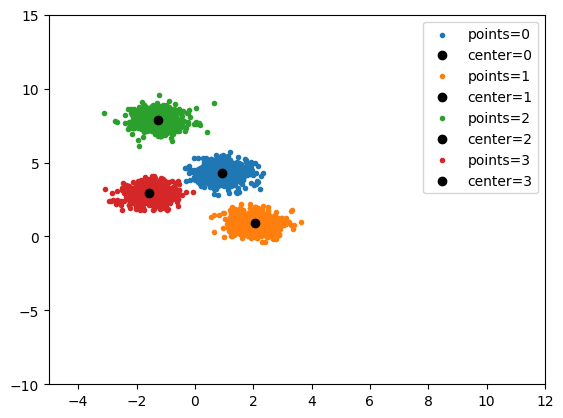

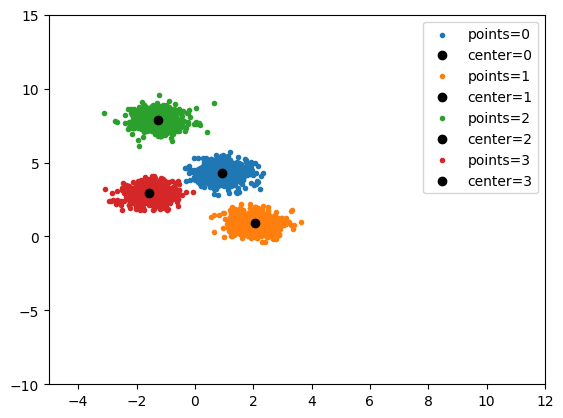

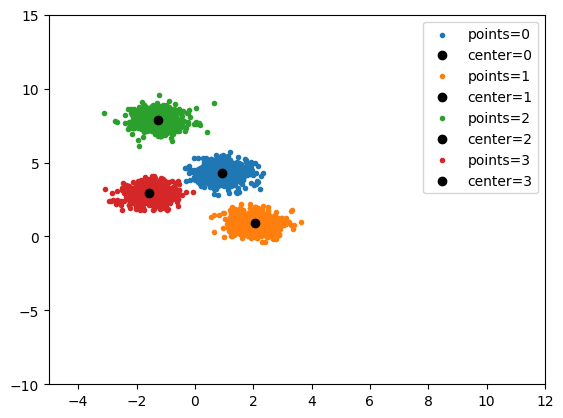

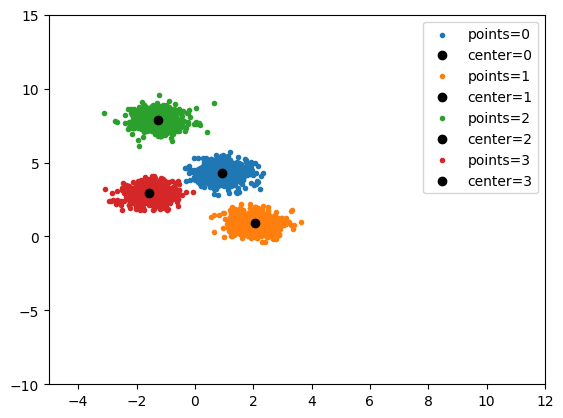

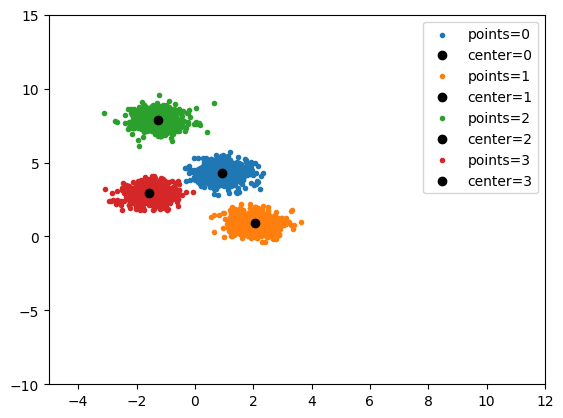

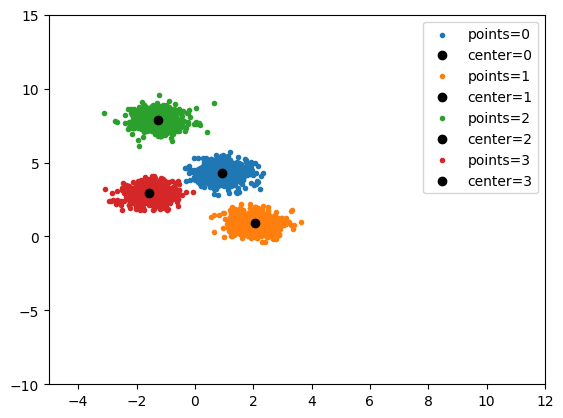

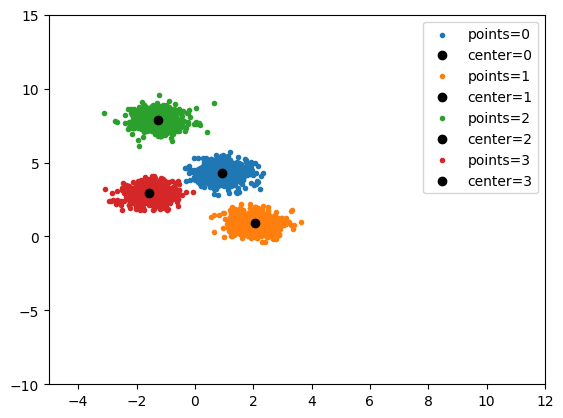

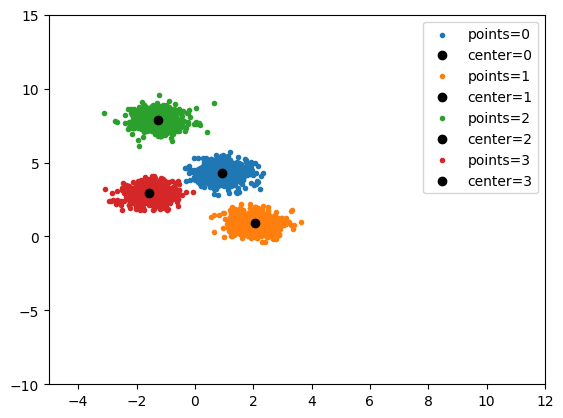

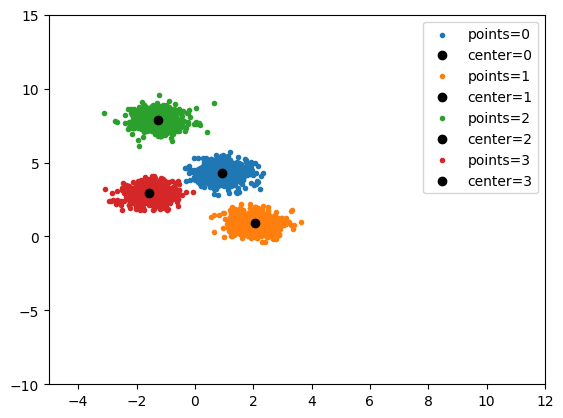

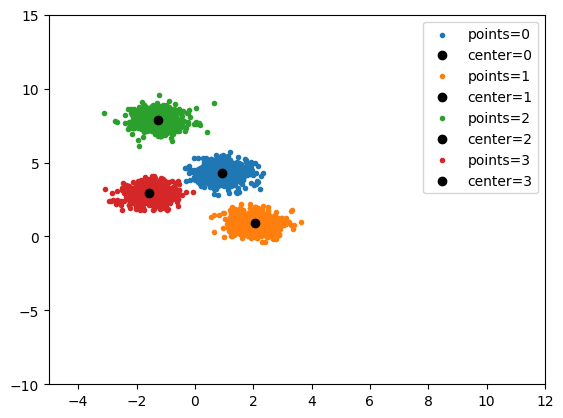

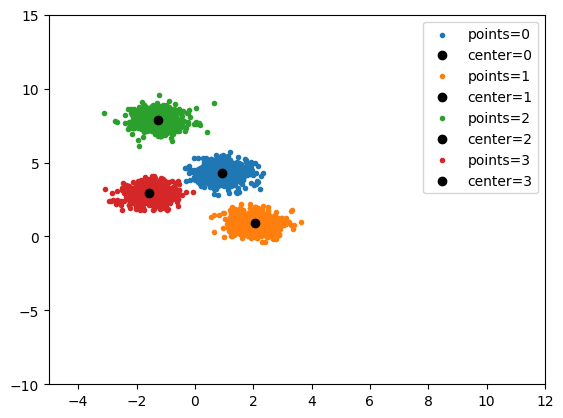

In [13]:
# Initialise centroids
centroids = data[np.random.choice(range(data.shape[0]), size = (4, ))]

# Create a list to store which centroid is assigned to each dataset
assigned_centroids = np.zeros(len(data), dtype = np.int32)


def get_closest_centroid(x, centroids):

    # Loop over each centroid and compute the distance from data point.
    dist = euclidean(x, centroids)

    # Get the index of the centroid with the smallest distance to the data point
    closest_centroid_index =  np.argmin(dist, axis = 1)

    return closest_centroid_index

animation_df = pd.DataFrame()  # only for animation

# Loop over iterations
for n in range(num_iters):

    # Get the closest centroid
    closest_centroid = get_closest_centroid(data, centroids)

    # Assign the centroid to the data point.
    assigned_centroids = closest_centroid

    # only for animation (skip)
    adf = pd.DataFrame()
    adf[['x', 'y']] = data
    adf['color'] = assigned_centroids
    adf['size'] = 5
    cdf = pd.DataFrame()
    cdf[['x','y']] = centroids
    cdf['color'] = 'red'
    cdf['size'] = 20
    adf = pd.concat([adf, cdf])
    adf['frame'] = n
    animation_df = pd.concat([animation_df, adf])


    # Loop over centroids and compute the new ones.
    for c in range(len(centroids)):
        # Get all the data points belonging to a particular cluster
        cluster_data = data[assigned_centroids == c]

        # Compute the average of cluster members to compute new centroid
        new_centroid = cluster_data.mean(axis = 0)

        # assign the new centroidq
        centroids[c] = new_centroid

        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], marker = '.', label = f'points={c}')
        plt.scatter(centroids[c][0], centroids[c][1], color = 'black', label = f'center={c}')
    plt.legend()
    plt.xlim(-5, 12)
    plt.ylim(-10, 15)
    plt.show()
    # plot(data, centroids)

Animation

In [14]:
import plotly.express as px

px.scatter(animation_df, x="x", y="y", animation_frame="frame", color="color", size='size', width=800, height=600)

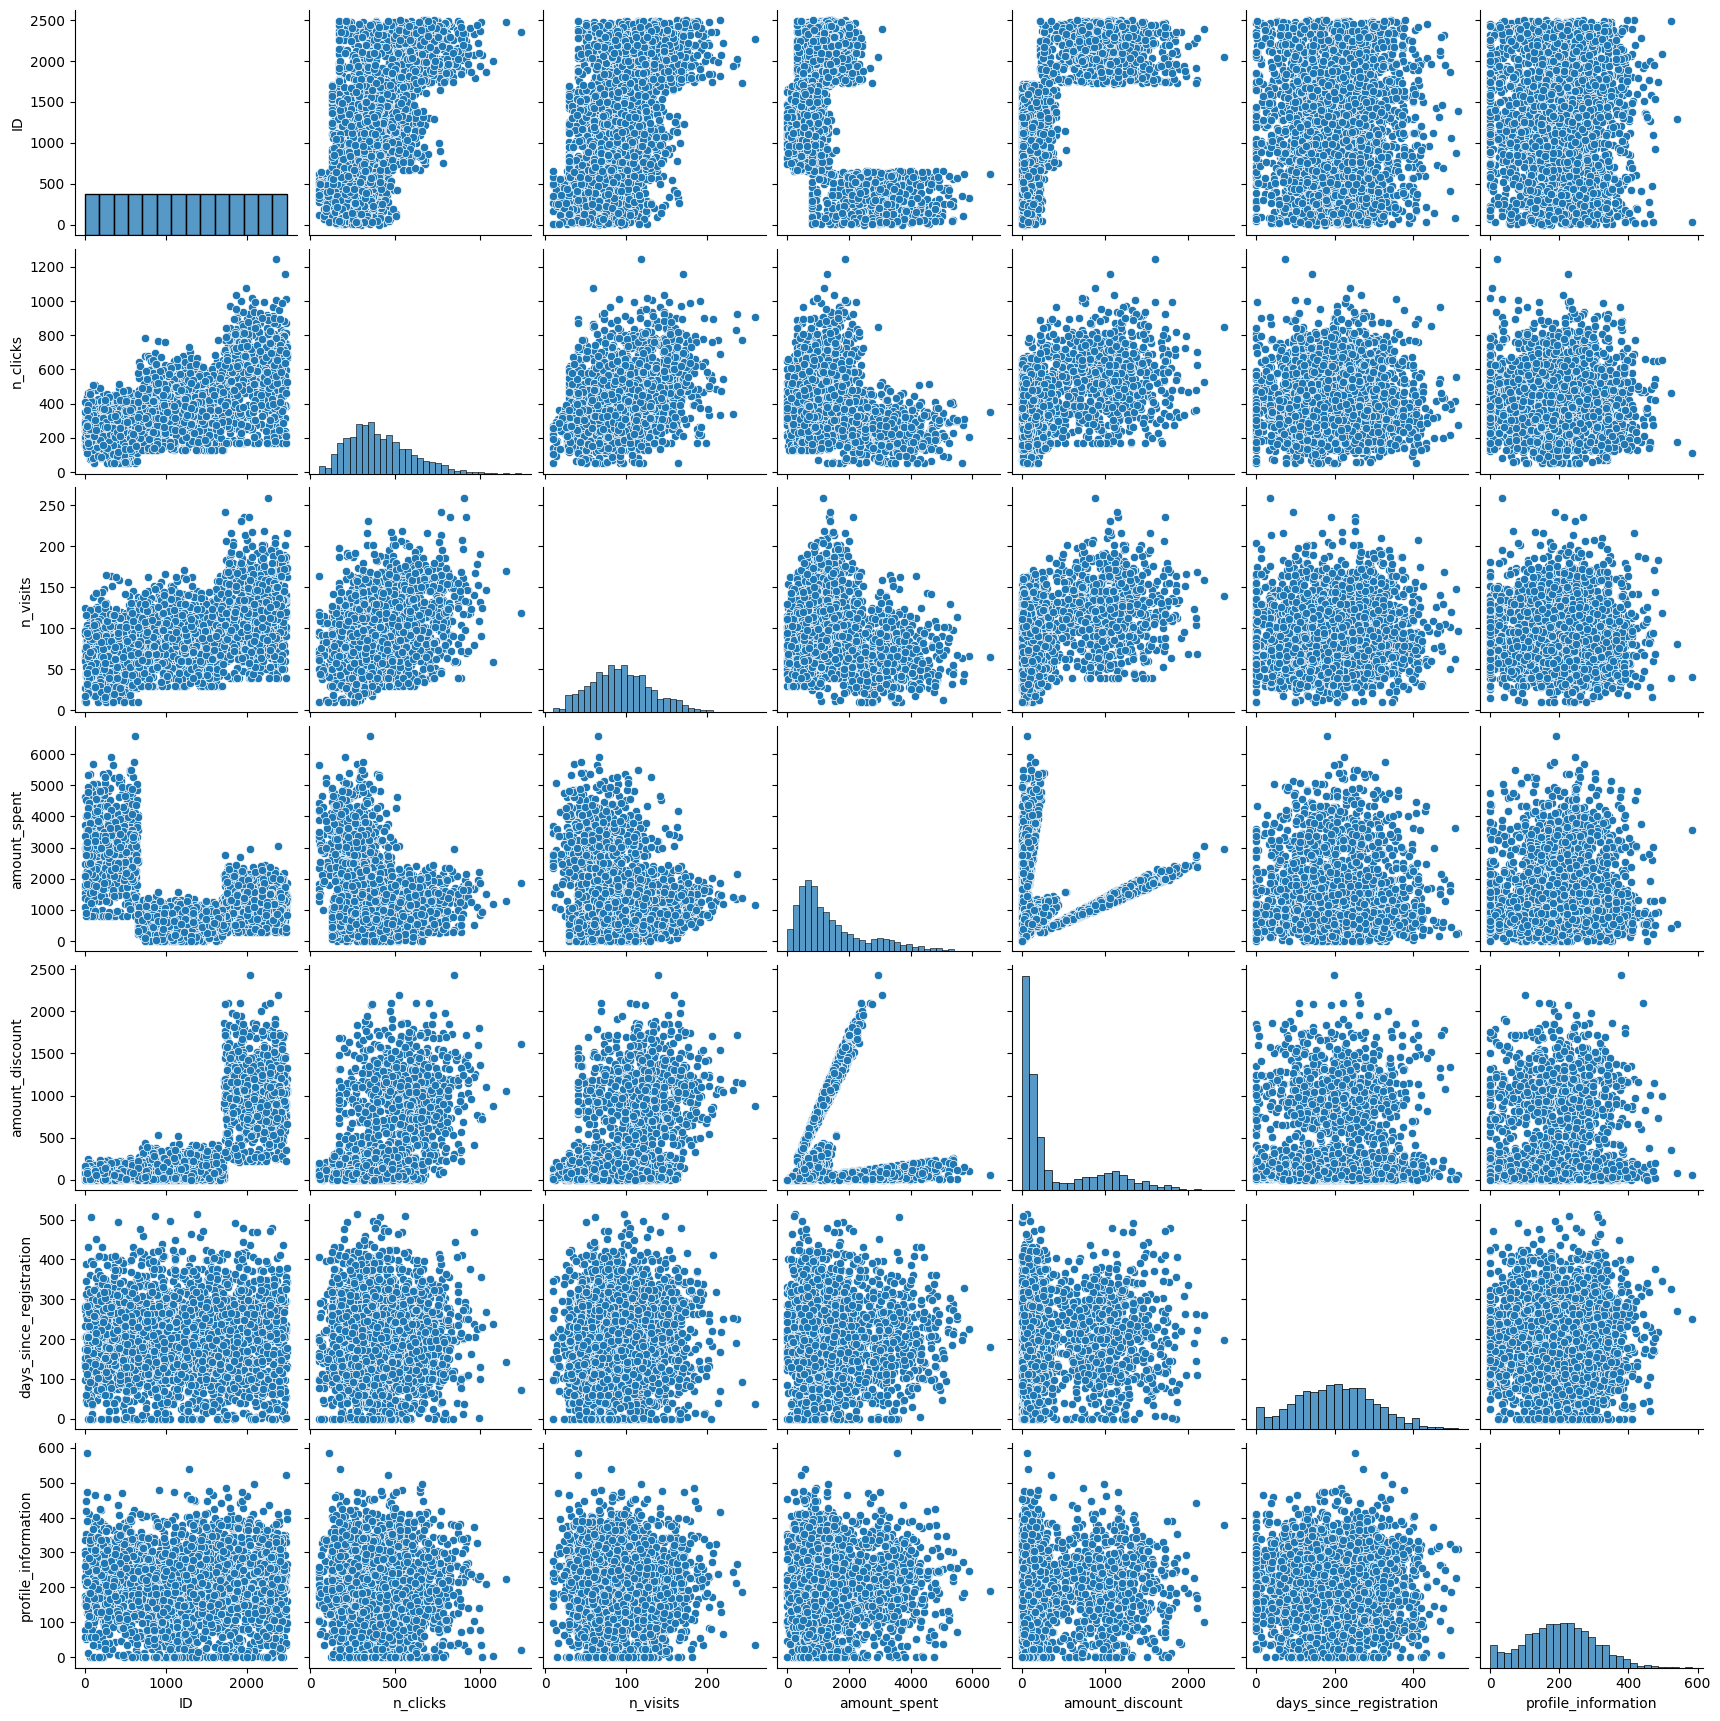

In [15]:
sns.pairplot(df)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2500 non-null   int64  
 1   n_clicks                 2500 non-null   int64  
 2   n_visits                 2500 non-null   int64  
 3   amount_spent             2500 non-null   float64
 4   amount_discount          2500 non-null   float64
 5   days_since_registration  2500 non-null   int64  
 6   profile_information      2500 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 136.8 KB


In [18]:
X = df.copy()
X.describe()

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
count,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,1249.50000,408.68000,94.475600,1445.090745,388.508637,200.973600,201.040400
std,721.83216,186.41409,38.866356,1167.663473,487.143968,99.136618,100.139213
min,0.00000,50.00000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,624.75000,274.75000,67.000000,609.618538,56.298615,130.000000,132.000000
50%,1249.50000,378.00000,92.000000,1036.189112,137.454623,200.000000,201.000000
75%,1874.25000,522.00000,119.000000,1949.270949,679.540536,268.000000,270.000000
max,2499.00000,1246.00000,259.000000,6567.402267,2428.406527,514.000000,585.000000


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

In [20]:
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [21]:
##coordinates of the cluster centers
kmeans.cluster_centers_

array([[0.47872725, 0.27983405, 0.32036426, 0.09146138, 0.05042405,
        0.39295362, 0.33402394],
       [0.12996468, 0.1717425 , 0.23810412, 0.46357432, 0.03096811,
        0.38447917, 0.364047  ],
       [0.84757824, 0.43876276, 0.45331525, 0.19882749, 0.42985575,
        0.39373309, 0.34023886]])

### Visualizing clusters

Let's create a dataframe where we will add a new column 'label' which will consist of the cluster labels assigned by k-means, for visualization purpose.

In [22]:
clusters = pd.DataFrame(X, columns=df.columns)
clusters['label'] = kmeans.labels_
clusters.head(3)

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,label
0,0.590636,0.066890,0.220884,0.032571,0.013013,0.453307,0.401709,0
1,0.614246,0.412207,0.144578,0.097333,0.002343,0.443580,0.290598,0
2,0.723089,0.392977,0.369478,0.176234,0.347685,0.480545,0.699145,2


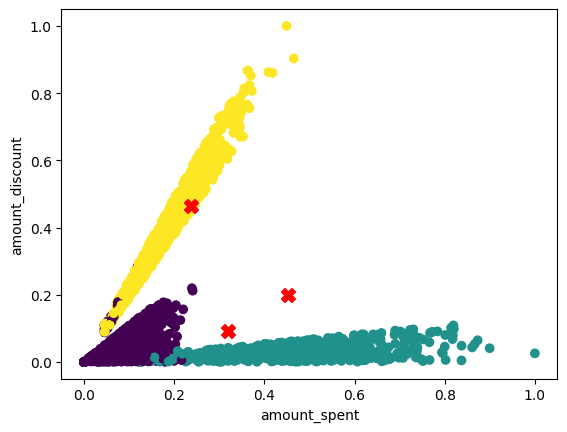

In [23]:
def viz_clusters(kmeans):
    plt.scatter(clusters['amount_spent'], clusters['amount_discount'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
                color="red",
                marker="X",
                s=100)
    plt.xlabel('amount_spent')
    plt.ylabel('amount_discount')

viz_clusters(kmeans)

In [24]:
import plotly.express as px

fig = px.scatter_3d(clusters, x='n_clicks', y='amount_spent', z='amount_discount', color='label', width=600, height=600)
fig.update_traces(marker=dict(size=2), selector=dict(mode='markers'))
fig.show()

In [25]:
# Inertia = Within Cluster Sum of Squares, WCSS
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]

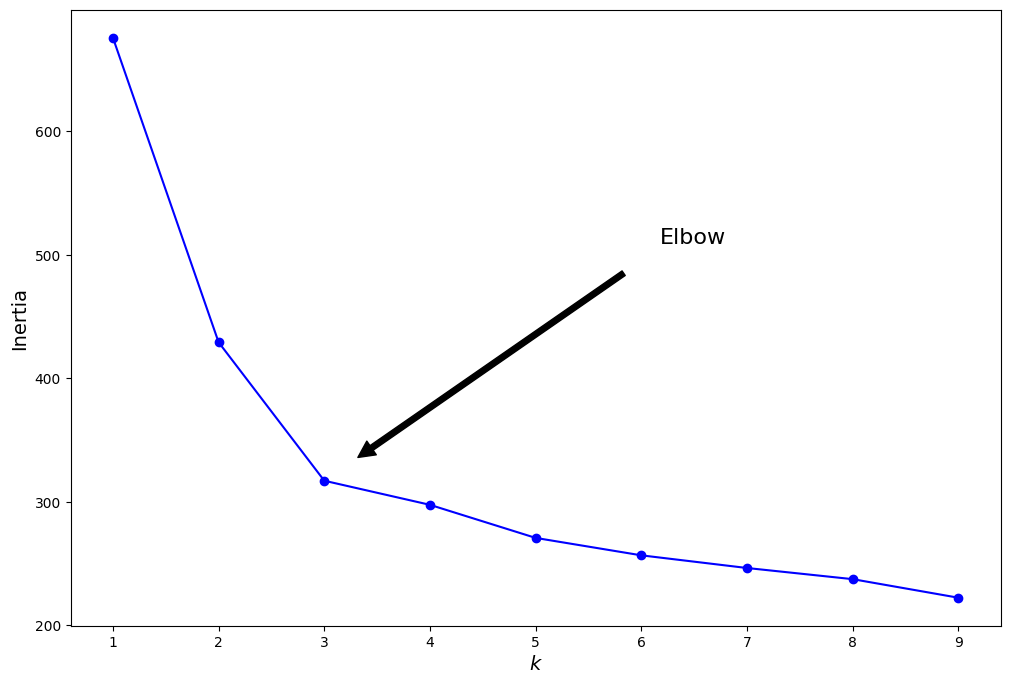

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()